In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df=pd.read_excel('IBM_Telco_customer_churn.xlsx')

In [115]:
demo=pd.read_excel('Telco_customer_churn_demographics.xlsx')
service=pd.read_excel('Telco_customer_churn_services.xlsx')
churn=pd.read_excel('Telco_customer_churn_status.xlsx')

# Feature Engineering

In [116]:
# checked all files- Nextly we move all unique columns to one single dataframe
demo.drop(['Count', 'Gender', 'Senior Citizen',
       'Married', 'Dependents'], inplace=True, axis=1)

In [117]:
service.drop(['Count', 'Quarter', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges'], axis=1, inplace=True)

In [118]:
churn.drop(['Count', 'Quarter', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)

In [119]:
df=pd.merge(df, demo, left_on='CustomerID', right_on='Customer ID', copy=False)

In [120]:
df=pd.merge(df, service, left_on='CustomerID', right_on='Customer ID', copy=False)

In [121]:
df=pd.merge(df, churn, left_on='CustomerID', right_on='Customer ID', copy=False)

In [122]:
df.drop(['Count', 'Churn Reason', 'Customer ID_x',
       'Customer ID_y', 'Customer ID'], axis=1, inplace=True)

In [123]:
df.info()

#(df.isna().sum()/7043)*100

#Clean dataset: No nulls, except in Churn category, which is accurately depicted.
#15 numeric variables, 27 categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               7043 non-null   object 
 1   Country                  7043 non-null   object 
 2   State                    7043 non-null   object 
 3   City                     7043 non-null   object 
 4   Zip Code                 7043 non-null   int64  
 5   Lat Long                 7043 non-null   object 
 6   Latitude                 7043 non-null   float64
 7   Longitude                7043 non-null   float64
 8   Gender                   7043 non-null   object 
 9   Senior Citizen           7043 non-null   object 
 10  Partner                  7043 non-null   object 
 11  Dependents               7043 non-null   object 
 12  Tenure Months            7043 non-null   int64  
 13  Phone Service            7043 non-null   object 
 14  Multiple Lines          

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000


In [13]:
# statistical summary of categorical data attributes
df.describe(include = np.object).T

#'Total Charges' appear to be object datatype, instead of float

,count,unique,top,freq
CustomerID,7043,7043,8495-PRWFH,1
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1129,Los Angeles,305
Lat Long,7043,1652,"34.035849, -118.503508",5
Gender,7043,2,Male,3555
Senior Citizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
Phone Service,7043,2,Yes,6361


In [81]:
# df['Total Charges'] = pd.to_numeric(df['Total Charges']) --> gave error
print("No. of entries whose Total Charges are blank: ", sum(df['Total Charges']==' '))

#11 entries under 'Total Charges' are blank
#Viewing all the 11 entries to decide how to perform imputation
df[df['Total Charges']==' '].T

#Tenure months is 0 for all these entries, although customer status is 'stayed'. Hence, let's try retrieving 'tenure months' value from one of the other datasets.

No. of entries whose Total Charges are blank:  11


,2234,2438,2568,2667,2856,4331,4687,5104,5719,6772,6840
CustomerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
Country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
State,California,California,California,California,California,California,California,California,California,California,California
City,San Bernardino,Independence,San Mateo,Cupertino,Redcrest,Los Angeles,Sun City,Ben Lomond,La Verne,Bell,Wilmington
Zip Code,92408,93526,94401,95014,95569,90029,92585,95005,91750,90201,90744
Lat Long,"34.084909, -117.258107","36.869584, -118.189241","37.590421, -122.306467","37.306612, -122.080621","40.363446, -123.835041","34.089953, -118.294824","33.739412, -117.173334","37.078873, -122.090386","34.144703, -117.770299","33.970343, -118.171368","33.782068, -118.262263"
Latitude,34.0849,36.8696,37.5904,37.3066,40.3634,34.09,33.7394,37.0789,34.1447,33.9703,33.7821
Longitude,-117.258,-118.189,-122.306,-122.081,-123.835,-118.295,-117.173,-122.09,-117.77,-118.171,-118.262
Gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
Senior Citizen,No,No,No,No,No,No,No,No,No,No,No


In [82]:
service=pd.read_excel('Telco_customer_churn_services.xlsx')

In [83]:
for id in df[df['Total Charges']==' ']['CustomerID']:
    print(service[service['Customer ID']==id][['Customer ID', 'Tenure in Months', 'Monthly Charge', 'Total Charges']])

     Customer ID  Tenure in Months  Monthly Charge  Total Charges
2847  4472-LVYGI                10           52.55          525.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
3020  3115-CZMZD                10           20.25          202.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
3139  5709-LVOEQ                10           80.85          808.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
3225  4367-NUYAO                10           25.75          257.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
3390  1371-DWPAZ                10           56.05          560.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
4689  7644-OMVMY                10           19.85          198.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
4997  3213-VVOLG                10           25.35          253.5
     Customer ID  Tenure in Months  Monthly Charge  Total Charges
5359  2520

In [84]:
#As seen above, tenure in months=10 for all 11 entries & total charges= monthly charges*tenure months. Imputed into df below:

for i in df[df['Total Charges']==' '].index:
    df['Tenure Months'].loc[i]=10
    df['Total Charges'].loc[i]= str(df['Monthly Charges'].loc[i]*df['Tenure Months'].loc[i])
df['Total Charges']=pd.to_numeric(df['Total Charges'])

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Exploratory Data Analysis - Univariate

In [85]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

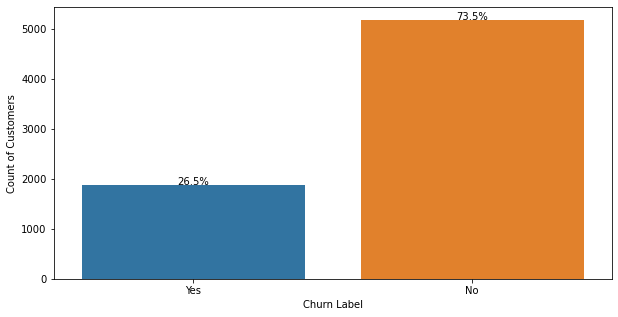

In [19]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Churn Label', data=df)
ax.set(ylabel="Count of Customers")
total=len(df)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height*100/total), ha="center")

#Imbalanced classes in the target variable

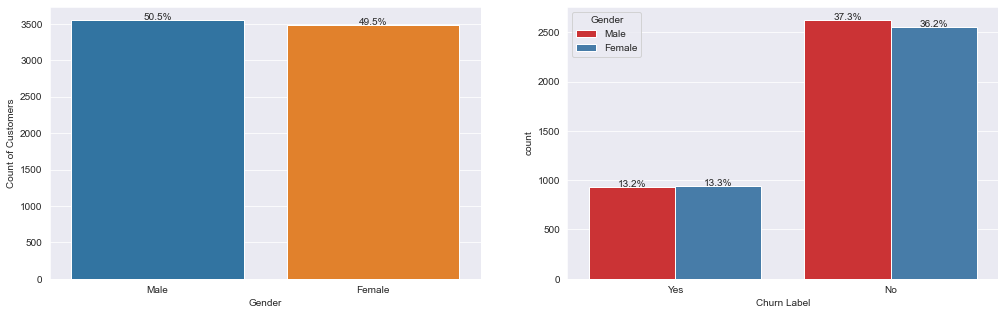

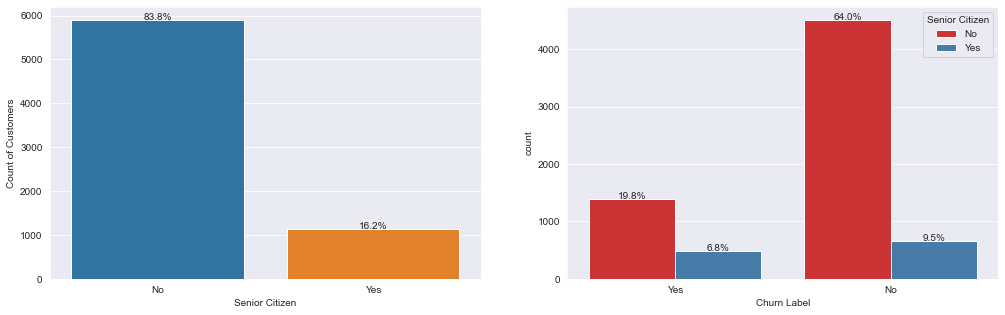

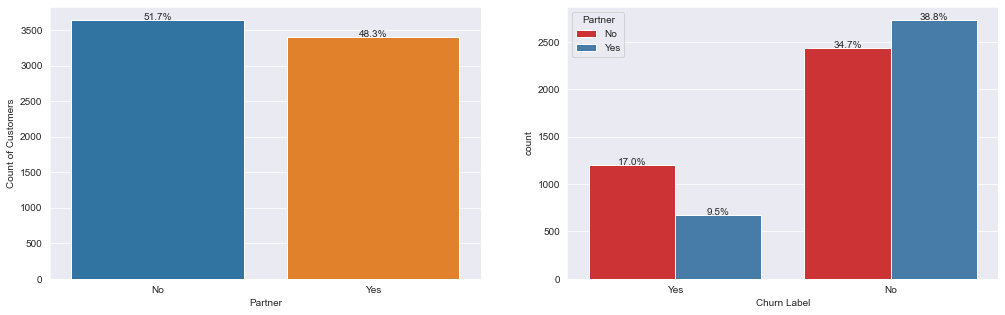

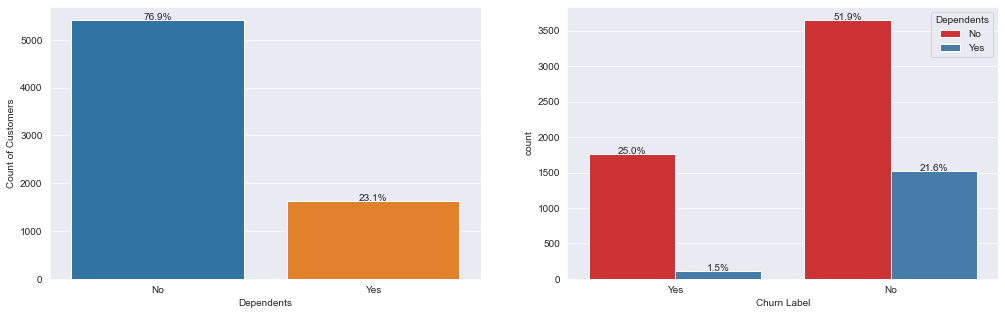

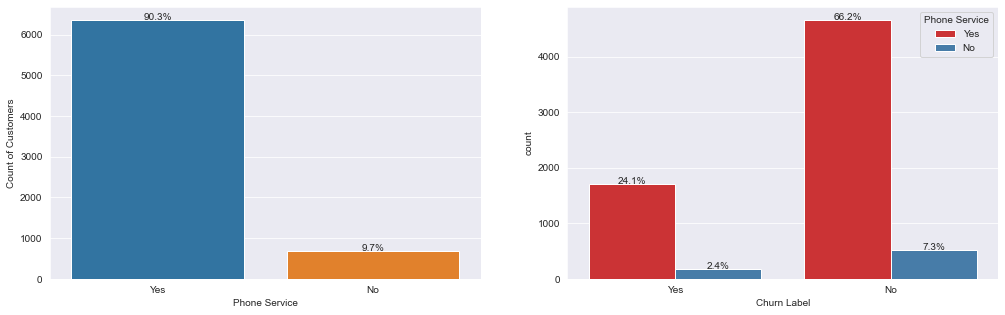

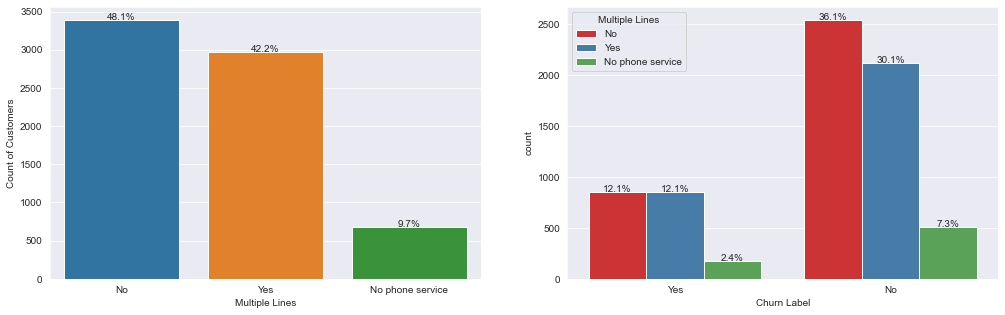

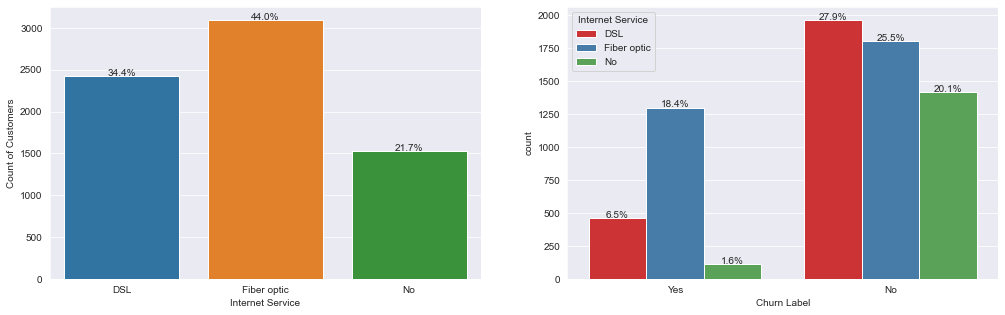

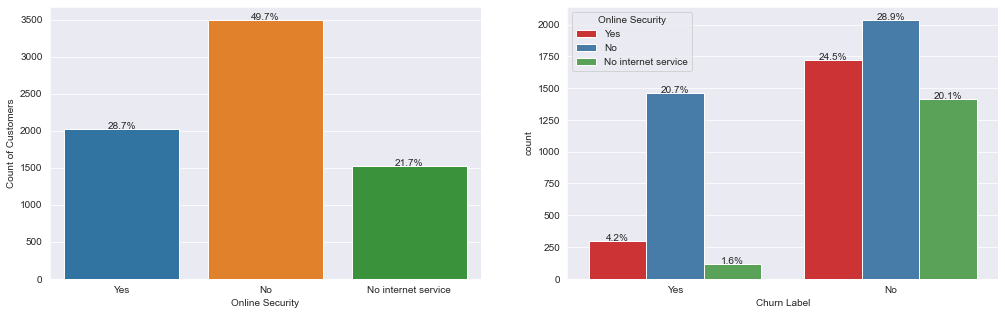

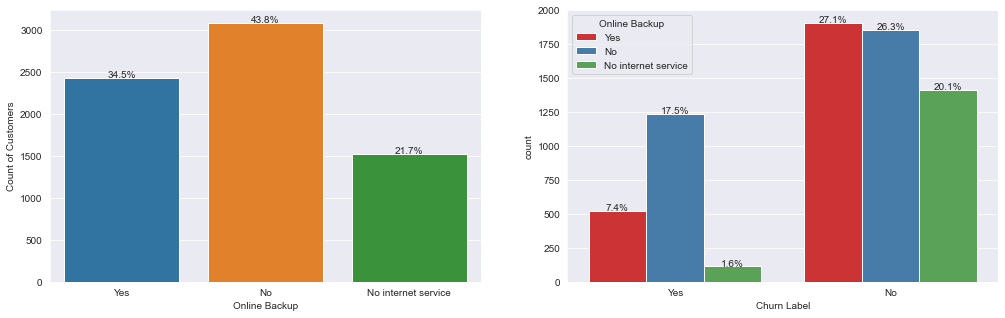

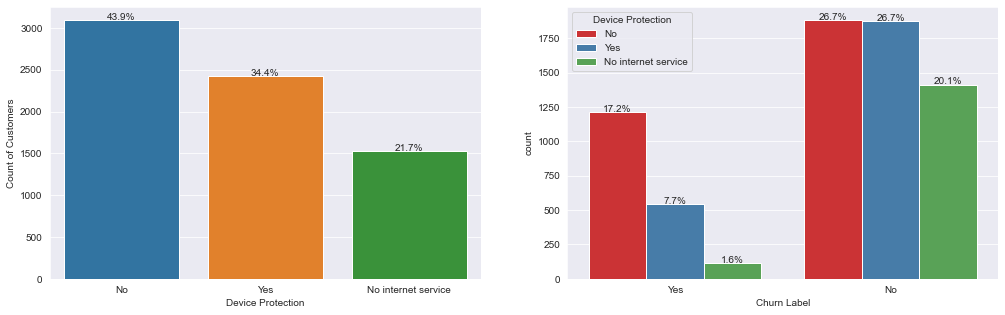

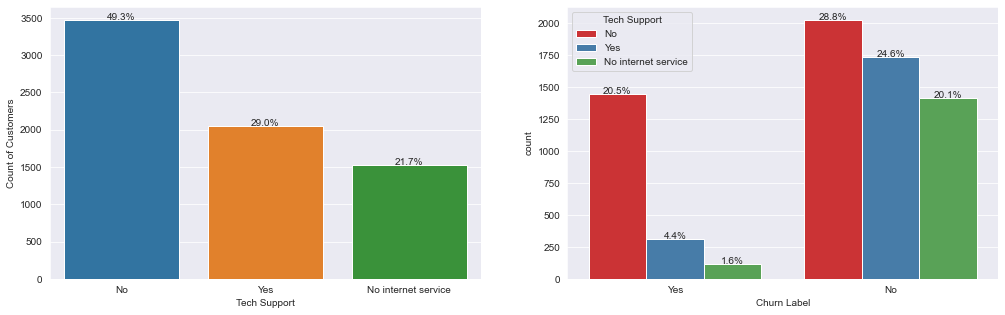

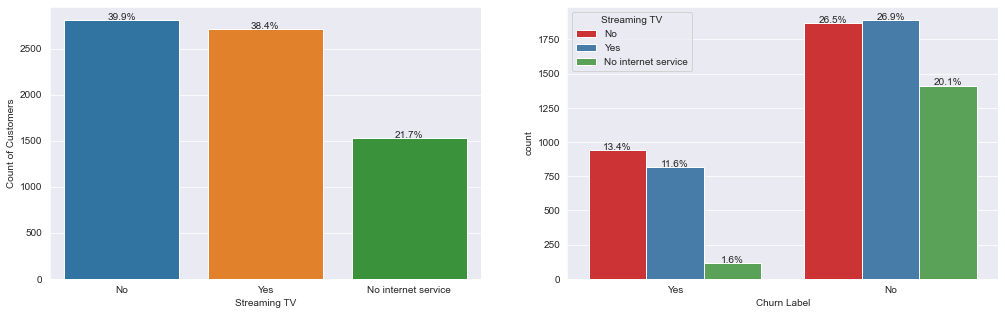

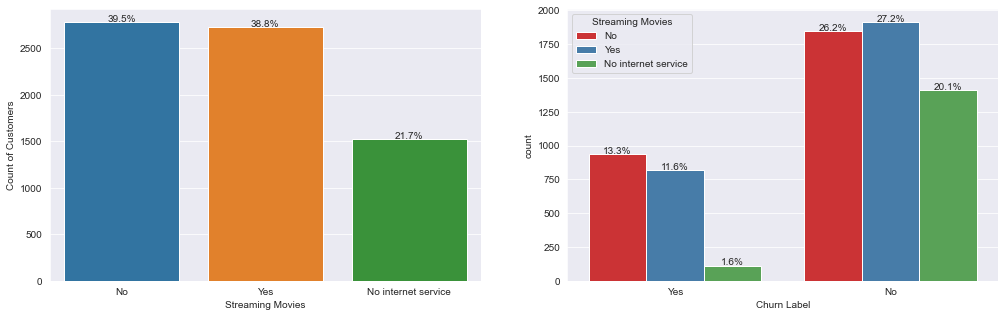

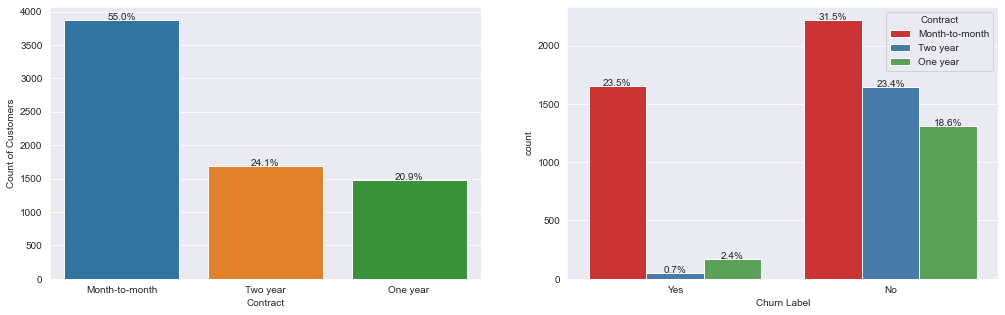

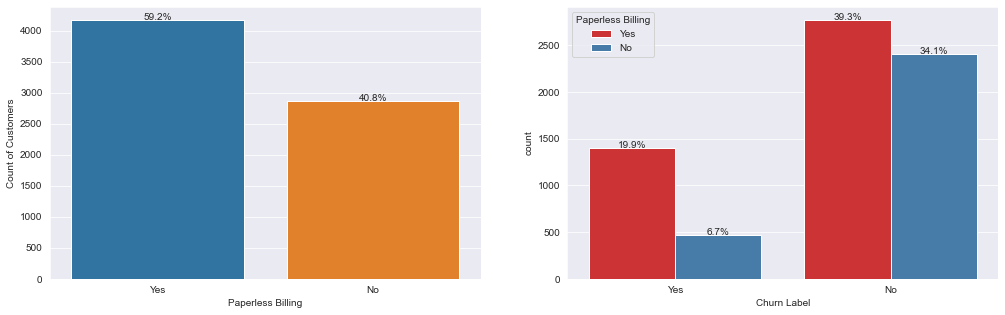

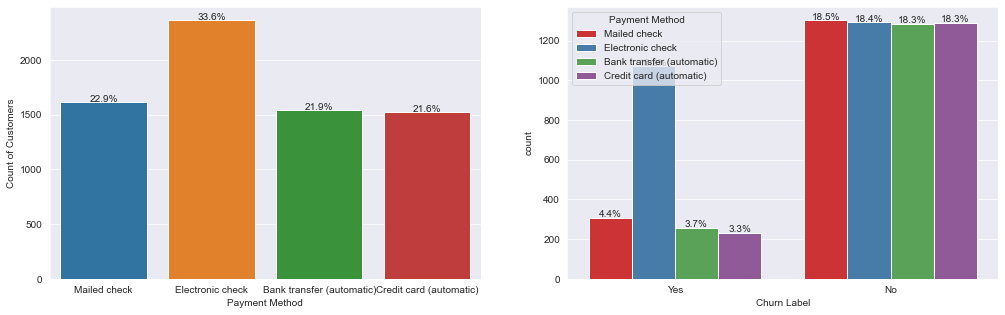

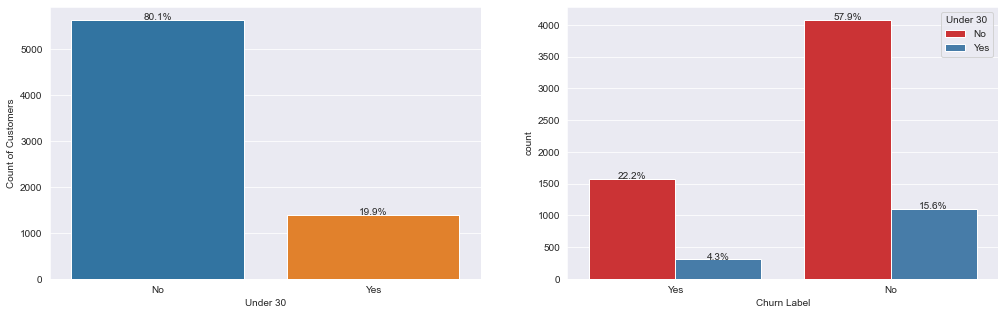

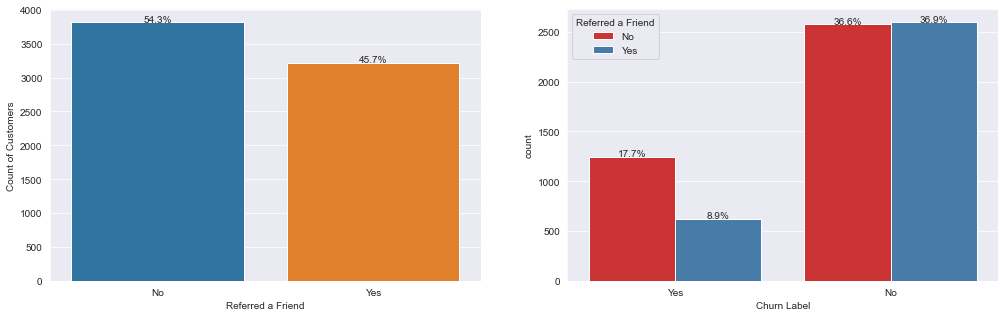

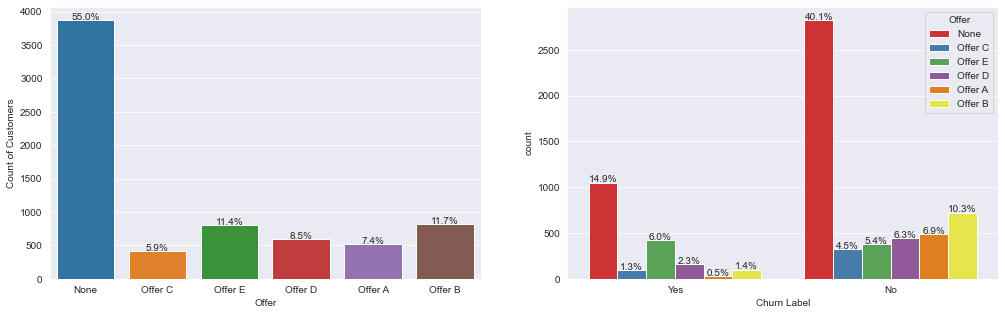

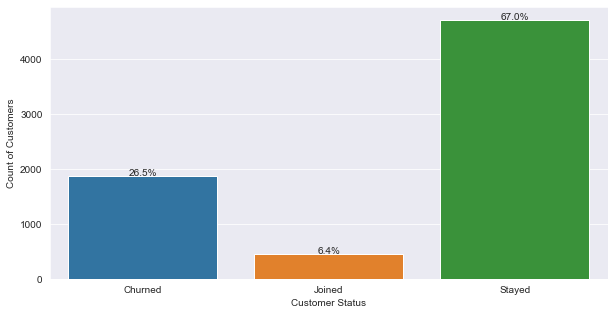

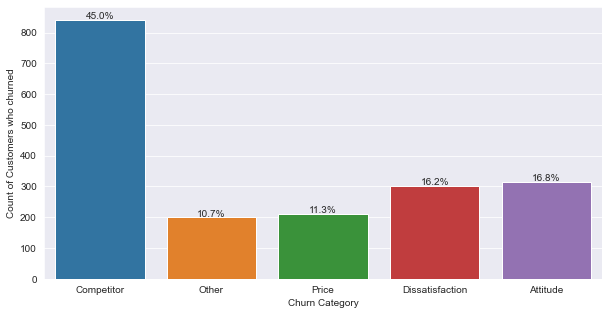

In [20]:
sns.set_style('darkgrid')
def annot(ax, total=len(df)):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.1f}%'.format(height*100/total), ha="center")
for i in df.describe(include = np.object).columns.drop(['Churn Label', 'CustomerID', 'Country', 'State', 'City', 'Lat Long']):
    if i not in ['Churn Category', 'Customer Status']:
        plt.figure(figsize=(17,5))
        plt.subplot(1,2,1)
        ax=sns.countplot(x=i, data=df)
        ax.set(ylabel="Count of Customers")
        annot(ax)
        plt.subplot(1,2,2)
        ax=sns.countplot(x='Churn Label', hue=i, data=df, palette='Set1')
        annot(ax)
        plt.show()
    elif i=='Customer Status':
        plt.figure(figsize=(10,5))
        ax=sns.countplot(x=i, data=df)
        ax.set(ylabel="Count of Customers")
        annot(ax)
    else:
        total= float(len(df[df['Churn Label']=='Yes']))
        plt.figure(figsize=(10,5))
        ax=sns.countplot(x=i, data=df[df['Churn Label']=='Yes'])
        ax.set(ylabel="Count of Customers who churned")
        annot(ax, total)

Observations:

1. Genders are approx. equally distributed into Male & Female, and has no noticeable effect on churn. 
2. Only 16% of customers are Senior citizens, and has no contribution to churn. 
3. Partner variabe is approx. equally distributed. Singles are more likely to churn as compared to those with partners. **
4. Majority customers have no dependents, and this has no effect on churn, even as no. of dependents increase. 
5. Majority customers have phone service, but this has no noticeable effect on churn, even when multiple lines are considered. This is a bit unusual as we would expect those invested in the services with multiple lines to be less likely to churn.
6. Internet Service has almost balanced classes between customers who opted for DSL, Fibre Optic and No Internet Service. However, those with Fibre Optic service were more likely to churn as compared to the other 2 classes. **
7. Majority have NOT opted for online security, online backup, Device Protection, Tech Support, Streaming TV or Streaming movies, although the classes are more balanced for Streaming TV and Streaming Movies. But non-optants are significantly higher than the other classes amongst those who churned. --> There seems to be a possibility that churn is occuring more amongst internet service opters who have NOT used these services.**
8. Majority are month-to-month contractors. Churn is very high amongst month-to-month contractors as compared to those in 1-year and 2-year contracts. However, Month-to-month contractors also dominate the non-churn category, but in a comparatively much more balanced manner. Contract length could be a good predictor for churn label. **
9. Paperless billing has no noticeable effect on churn.
10. Payment methods are somewhat balanced overall, and very balanced in the non-churn category. In the churned class, majority are Electronic check users. **
11. Referred a friend option has been approx. equally used by customers, and has no effect on Churn.
12. Vast majority of customers have used no offers, and the same is seen amongst both Churn classes. But Offer E has the most churned customers comparatively, and Offer B has the least churned customers comparatively.
13. Majority of the customer base (55%) are retained customers, followed by churned ones. Newly joined customers are the least.
14. Amongst those who churned, vast majority (45%) felt that competitors had better offerings. This indicates that the company needs to re-evaluate its marketplace competition and product offerings.

The observations succeeded by ** will be explored later via bi-variate analysis

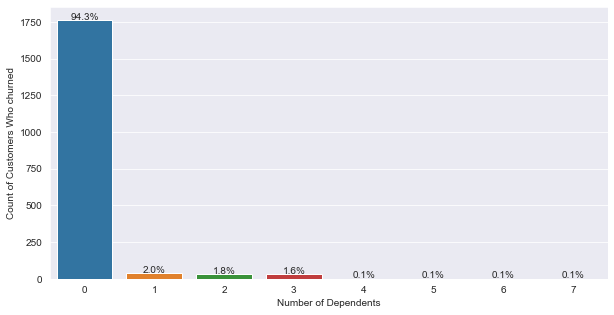

In [21]:
#Number of dependents amongst those who churned: No visible trend.
total= float(len(df[df['Churn Label']=='Yes']))
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Number of Dependents', data=df[df['Churn Label']=='Yes'])
ax.set(ylabel="Count of Customers Who churned")
annot(ax, total)

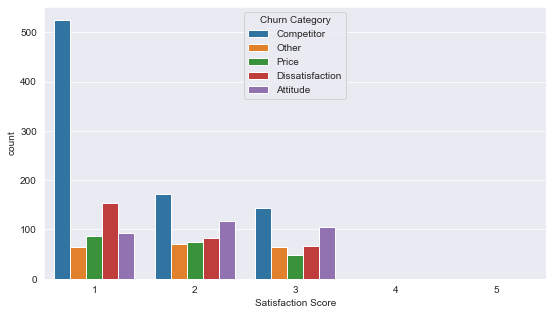

In [22]:
plt.figure(figsize=(9,5))
sns.countplot('Satisfaction Score', hue='Churn Category', data=df)

#Lowest satisfaction score of 1 has been recorded by those who churned due to 'Competitor category'.
#Those who gave Satisfaction scores of 4 or 5 have not churned.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C63ABC2DD8>,
      dtype=object)

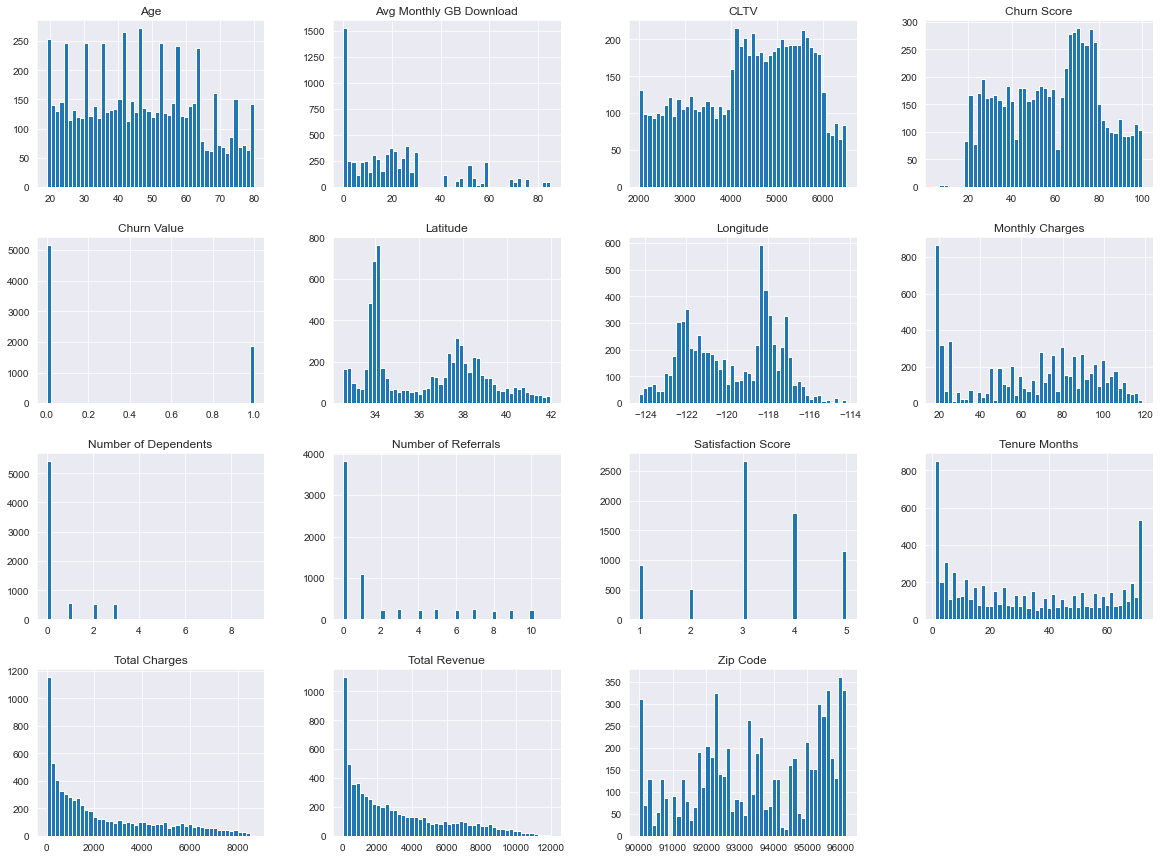

In [26]:
df.hist(bins=50, figsize=(20,15))

Total revenue is inclusive of total charges, tenure months and other data/phone charges. Hence going forward, only Total revenue will be used for modeling. Total revenue is right-skewed.

Skew in Churn score:  -0.09 It is approx. normal
Skew in CLTV:  -0.31 It is approx. normal


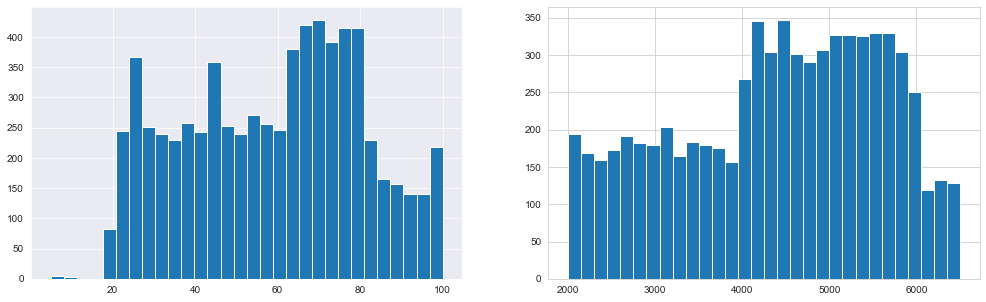

In [23]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)        
sns.set_style('whitegrid')
df['Churn Score'].hist(bins=30)
print("Skew in Churn score: ", round(df['Churn Score'].skew(), 2), "It is approx. normal")
print("Skew in CLTV: ", round(df['CLTV'].skew(), 2), "It is approx. normal")
plt.subplot(1,2,2)
df['CLTV'].hist(bins=30)

## Bivariate Analysis:

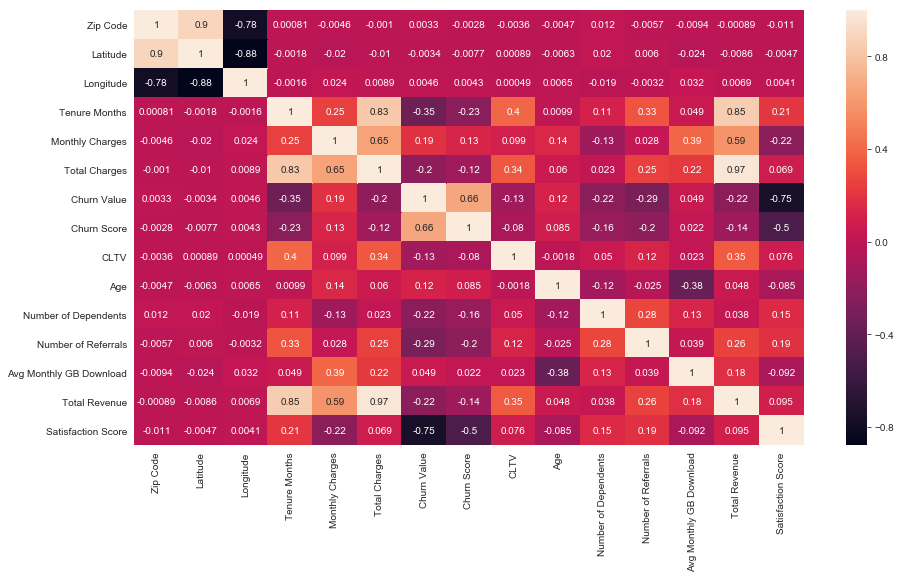

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cbar=True, annot=True)

#variables with high correlation: (Tenure Months, Total charges), (Tenure Months, Total Revenue), (Total Charges, Total Revenue)
# (Churn Value, Satisfaction score) - The expected correlations and trends are visible

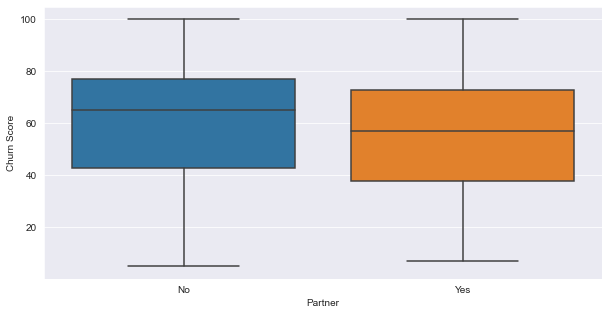

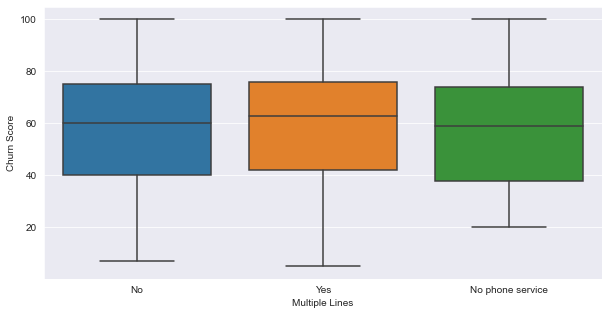

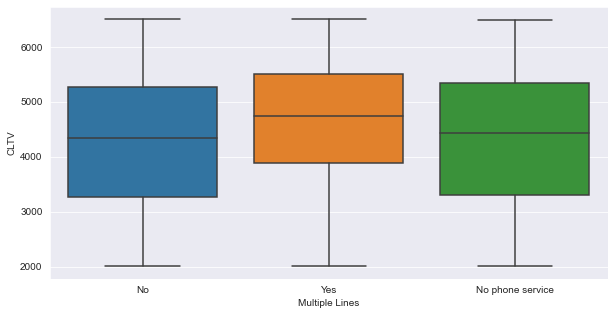

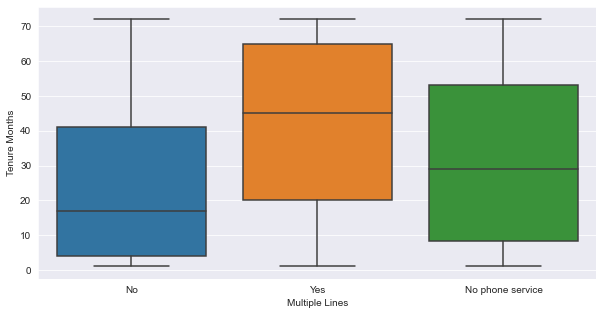

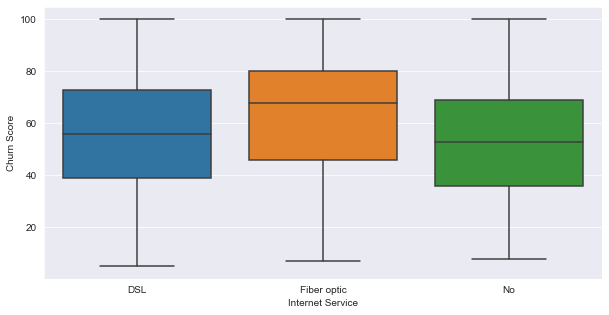

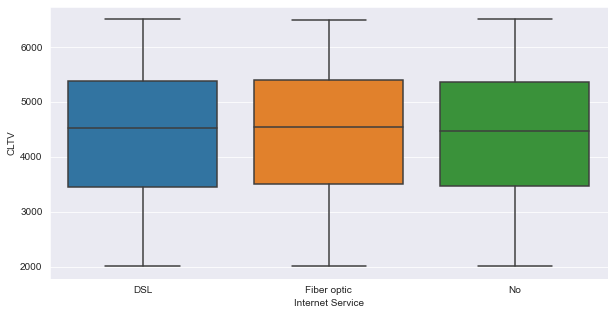

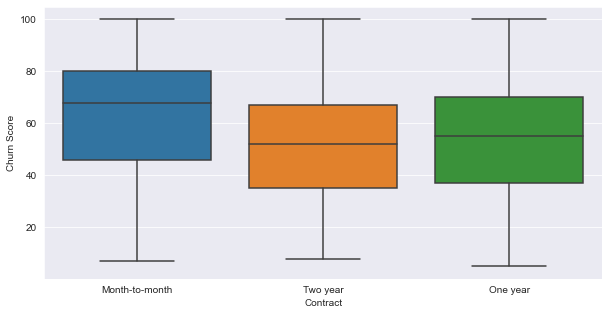

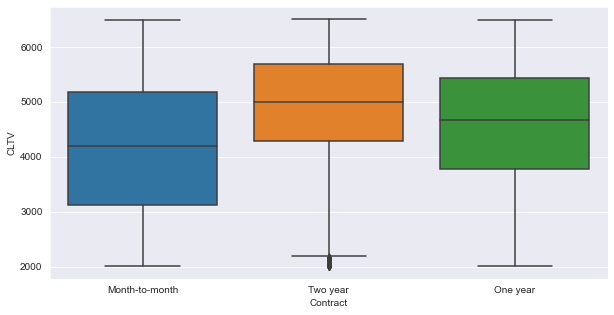

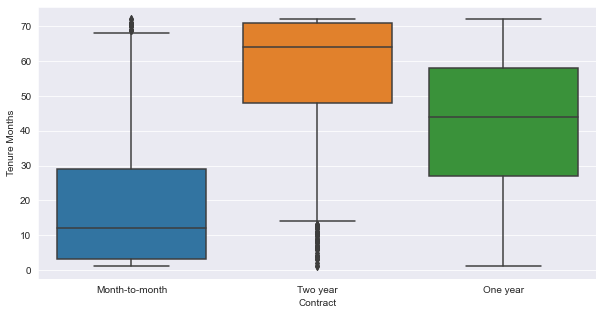

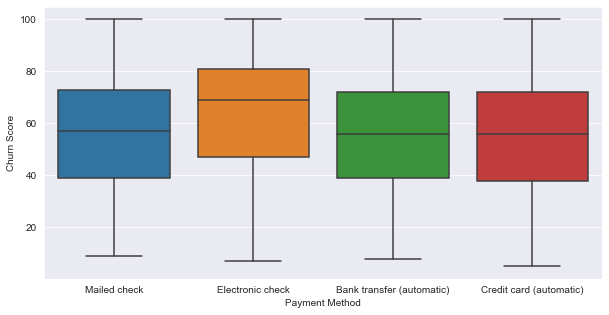

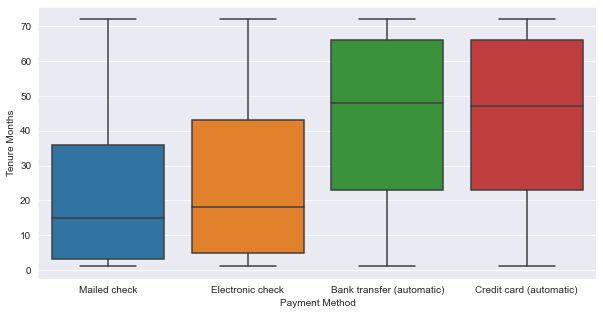

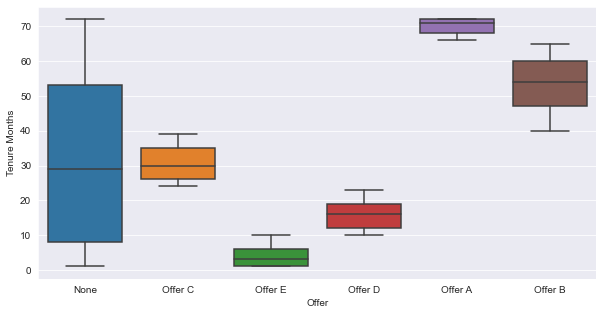

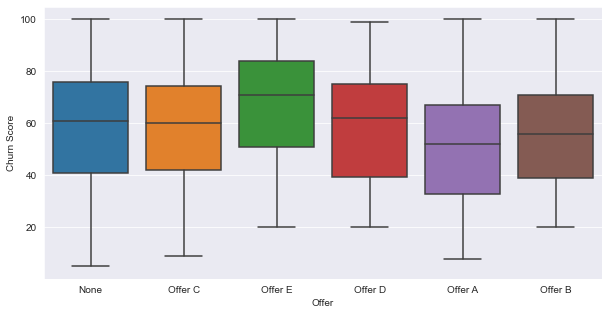

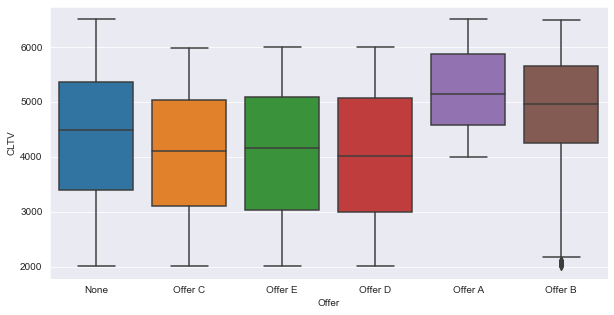

In [24]:
sns.set_style('darkgrid')
def box(x, y):
    plt.figure(figsize=(10,5))   
    ax = sns.boxplot(x, y, data=df)
    ax.set_xticklabels(ax.get_xticklabels())
box('Partner', 'Churn Score')
# #Churn scores are in a slightly lower range for those who have partners.
box('Multiple Lines', 'Churn Score')
# #No noticeable impact on Churn Scores due to number of phone lines.
box('Multiple Lines', 'CLTV')
# #CLTV scores are higher for those with Multiple phone lines.
box('Multiple Lines', 'Tenure Months')
# #Those with Multiple Lines do stay longer- this justifies the higher CLT values.
box('Internet Service', 'Churn Score')
# #Churn Scores for Fibre Optic users are in higher brackets.
box('Internet Service', 'CLTV')
#No visible impact on CLTV based on type of internet service used.
box('Contract', 'Churn Score')
box('Contract', 'CLTV')
box('Contract', 'Tenure Months')
#Those in month-to-month contract have higher churn scores, 2-year contracters have less variance in their CLTV's
#Month-to-month has much less Tenure months to cite, with outliers on the upper end, while 2-year contracters have outliers 
#on the lower end, but much higher tenure months to credit.
box('Payment Method', 'Churn Score')
box('Payment Method', 'Tenure Months')
# # Electronic Paymemt method sees more churn score and lesser tenure months. The Auto-payers tend to stay for longer.
box('Offer', 'Tenure Months')
box('Offer', 'Churn Score')
box('Offer', 'CLTV')
# # The Tenure months for different Offers are vastly different, with very little variance within. This is higly suggestive
#that Offers has some predictive power towards Churn and CLTV. Offer E- Least Tenure, Offer A- Highest tenure
#Churn scores and CLTV scores are not vastly different between the different offers, yet, Offer E has highest Churn score & 
#Offer A has highest CLTV, corroborating the pattern seen for Tenure months.

Observations:

1. Churn scores are in a slightly lower range for those who have partners.
2. No noticeable impact on Churn Scores due to number of phone lines.
3. CLTV scores are higher for those with Multiple phone lines.
4. Those with Multiple Lines do stay longer- this justifies the higher CLT values.
5. Churn Scores for Fibre Optic users are in higher brackets.
6. No visible impact on CLTV based on type of internet service used.
7. Those in month-to-month contract have higher churn scores, 2-year contracters have less variance in their CLTV's
8. Month-to-month has much less Tenure months to cite, with outliers on the upper end, while 2-year contracters have outliers on the lower end, but much higher tenure months to credit.
9. Electronic Paymemt method sees more churn score and lesser tenure months. The Auto-payers tend to stay for longer.
10. The Tenure months for different Offers are vastly different, with very little variance within. This is higly suggestive that Offers has some predictive power towards Churn and CLTV. Offer E- Least Tenure, Offer A- Highest tenure
11. Churn scores and CLTV scores are not vastly different between the different offers, yet, Offer E has highest Churn score & Offer A has highest CLTV, corroborating the pattern seen for Tenure months.

In [25]:
for i in ['Online Security', 'Online Backup','Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    print(i+":\n", df[i].value_counts())

Online Security:
 No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64
Online Backup:
 No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64
Device Protection:
 No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64
Tech Support:
 No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64
Streaming TV:
 No                     2810
Yes                    2707
No internet service    1526
Name: Streaming TV, dtype: int64
Streaming Movies:
 No                     2785
Yes                    2732
No internet service    1526
Name: Streaming Movies, dtype: int64


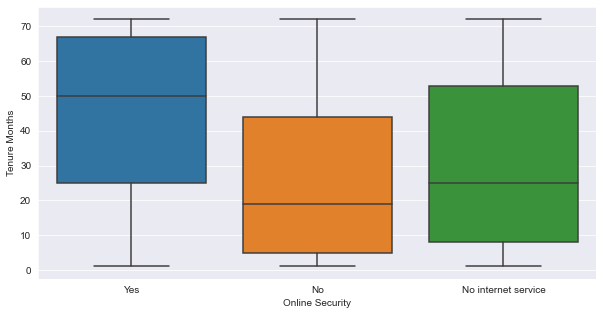

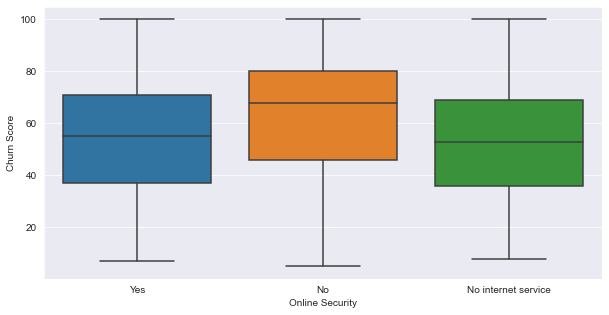

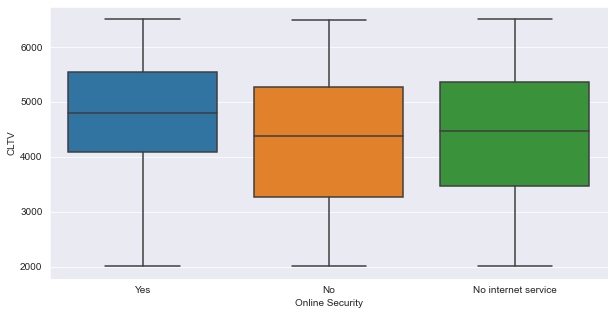

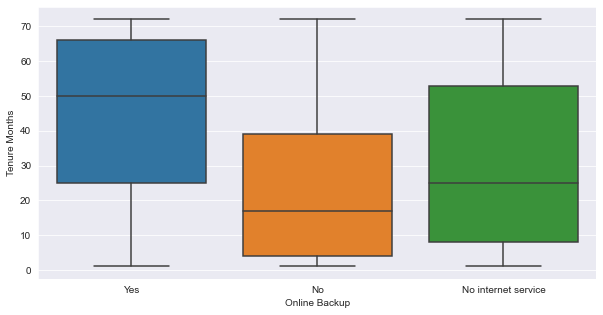

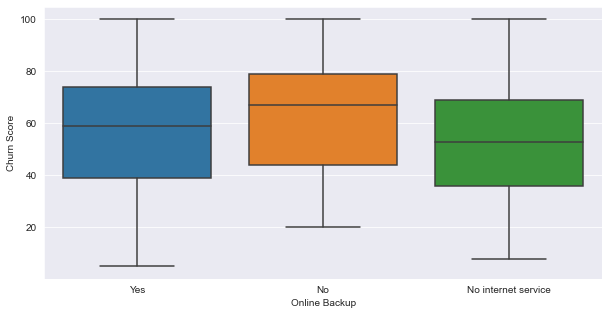

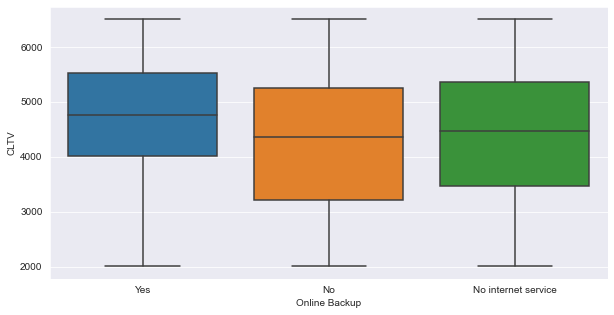

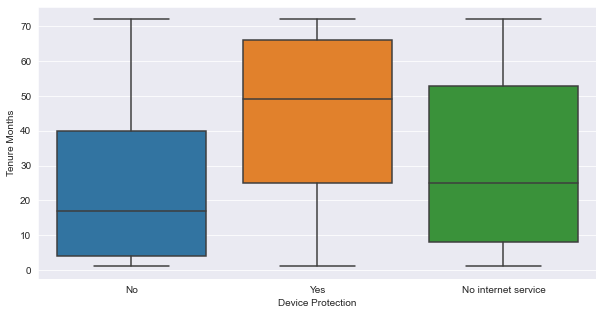

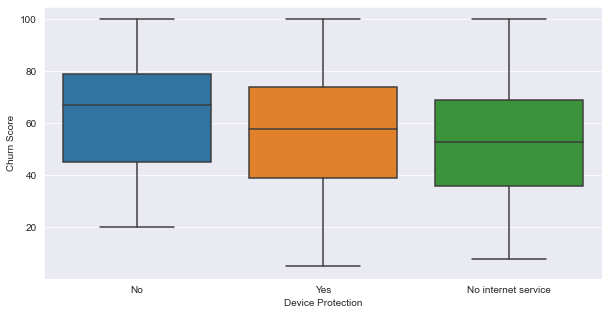

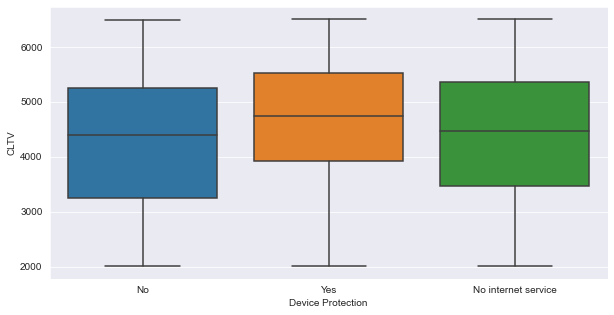

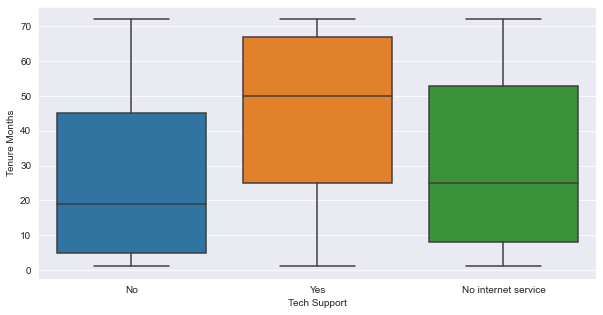

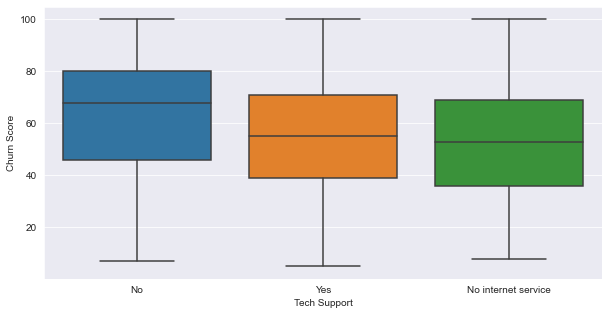

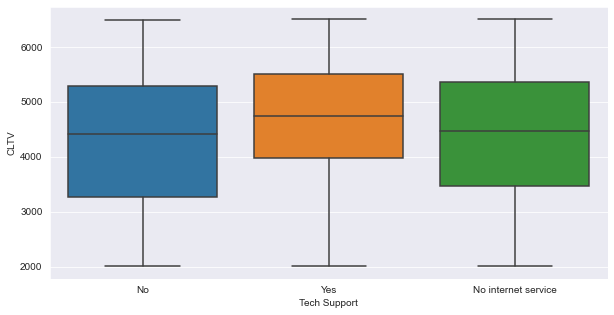

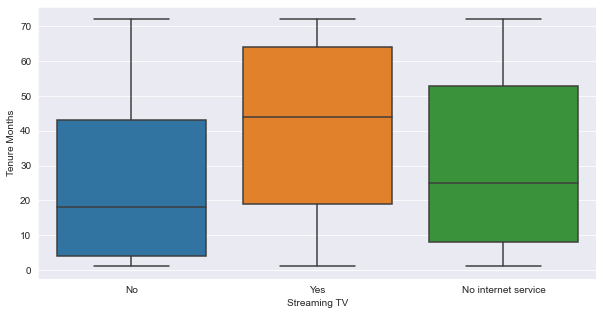

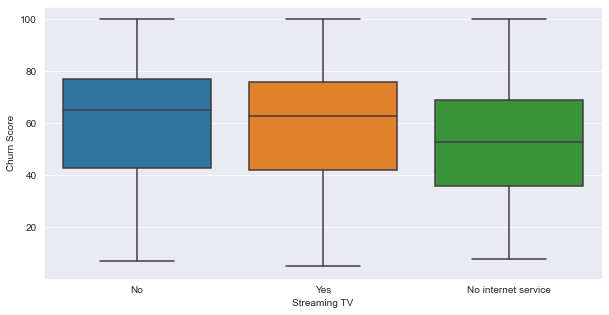

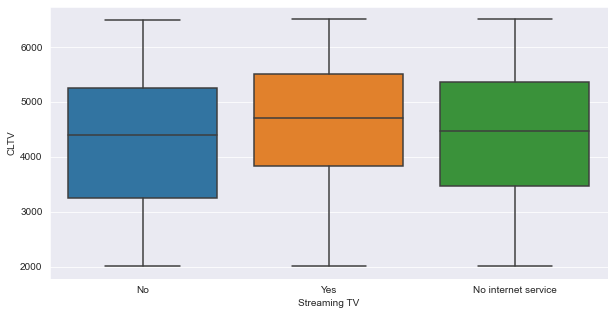

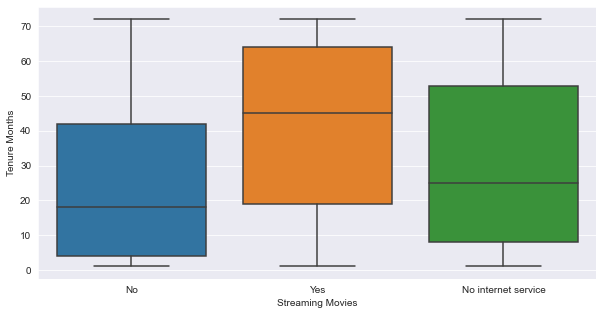

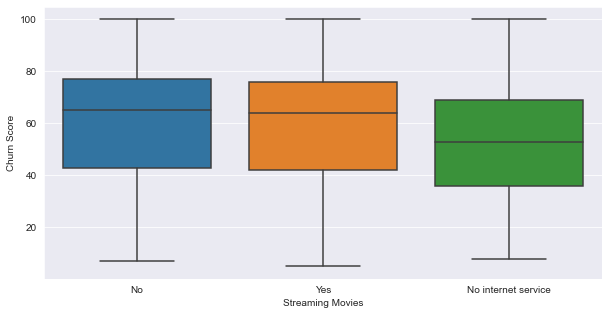

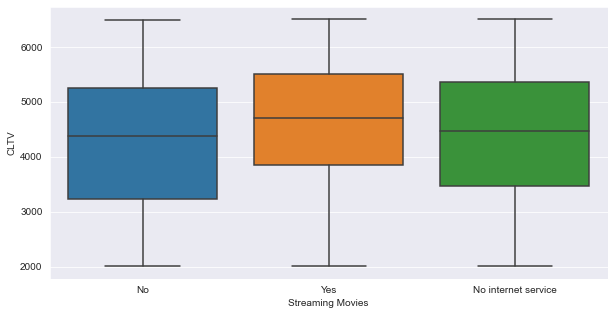

In [26]:
for i in ['Online Security', 'Online Backup','Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    box(i, 'Tenure Months')
    box(i, 'Churn Score')
    box(i, 'CLTV')
# All the above mentioned are add-ons available to those who do have internet services enabled. 
# The direct impact on Churn Scores and CLTV is not visible, but the difference are noticeable on Tenure Months.
# In all cases, optants of these add-ons tend to serve longer Tenure months.

All the above mentioned are add-ons available to those who do have internet services enabled. The direct impact on Churn Scores and CLTV is not visible, but the difference is noticeable on Tenure Months. In all cases, optants of these add-ons tend to serve longer Tenure months. 

Since it does not seem to have an immense direct effect on Churn Label, Churn Scores or CLTV, all the above variables will be set aside as Instrumental Variables to be used in case Endogeneity or bias is observed.

In [124]:
def change(x):
    if x in ['Bank transfer (automatic)', 'Credit card (automatic)']:
        return 'Auto-pay'
    else:
        return x
df['Payment Method']=df['Payment Method'].apply(change)

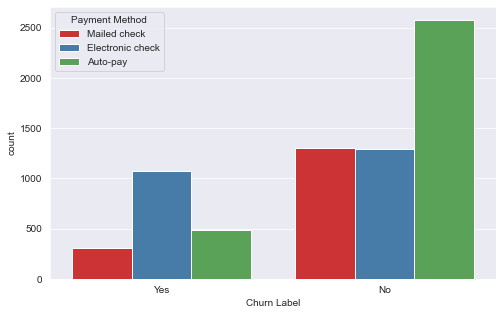

In [87]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label', hue='Payment Method', data=df, palette='Set1')

#The effect on Churn Label is more visible after re-bucketing.

In [125]:
df.groupby('City')['Churn Value'].sum().sort_values(ascending=False).head()

City
Los Angeles      90
San Diego        50
San Francisco    31
San Jose         29
Sacramento       26
Name: Churn Value, dtype: int64

In [30]:
df1=df.groupby('Age').sum()[['Churn Value', 'Churn Score']].reset_index()
df1.head()

,Age,Churn Value,Churn Score
0,19,18,7083
1,20,30,7344
2,21,36,8143
3,22,27,7039
4,23,29,8153


<Figure size 576x360 with 0 Axes>

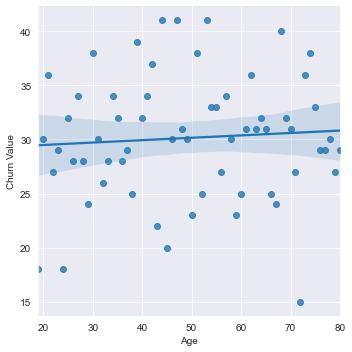

In [31]:
plt.figure(figsize=(8,5))
sns.lmplot('Age', 'Churn Value', data=df1)

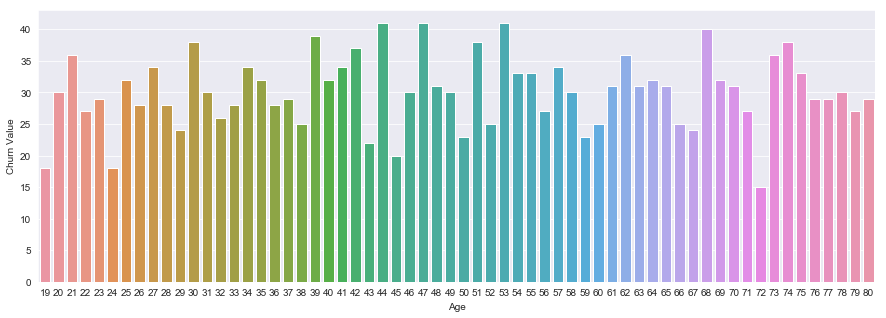

In [307]:
plt.figure(figsize=(15,5))
sns.barplot('Age', 'Churn Value', data=df1)
#No noticeable trend observed for impact of Age on Churn Value.

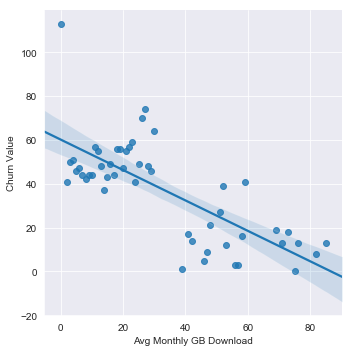

In [308]:
df1=df.groupby('Avg Monthly GB Download').sum()[['Churn Value', 'Churn Score']].reset_index()
sns.lmplot('Avg Monthly GB Download', 'Churn Value', data=df1)

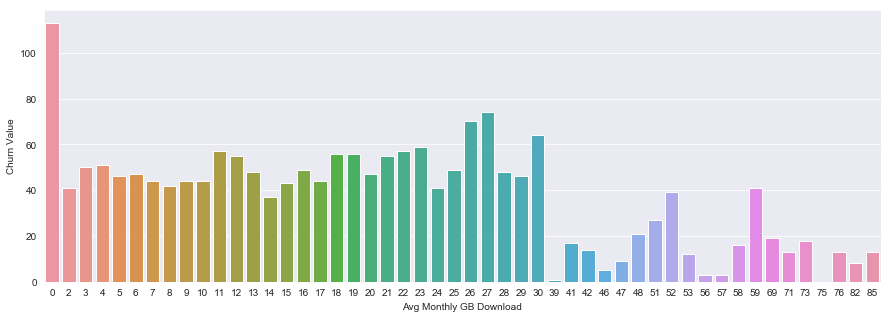

In [309]:
plt.figure(figsize=(15,5))
sns.barplot('Avg Monthly GB Download', 'Churn Value', data=df1)

#Clear trend observed: Total churned-users decreases as Avg. Monthly GB downloaded increases.
#It is hence possible that those who download more GB montly, are less likely to go ahead and churn.

# Predictive Modeling:

In [126]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm

In [127]:
df_final=df[df['Customer Status']!='Joined'][['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 
                                     'Contract', 'Payment Method', 'Churn Value', 'Churn Score', 'CLTV', 
                                    'Offer', 'Avg Monthly GB Download', 'Total Revenue', 'Satisfaction Score']]

In [128]:
df_final.reset_index(inplace=True)
df_final.drop('index', axis=1, inplace=True)

In [129]:
x=df_final.drop('Churn Value', axis=1)
y=df_final['Churn Value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

cat_x_train=x_train[['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 
                     'Contract', 'Payment Method', 'Offer']]

In [130]:
#Every model will be run twice- In the 2nd run, the entire set of churned observations will be used as test-set.
#This is to ensure that the model is capable of predicting the minority class (our required class) fairly accurately:

def run2(m):
    x_test=df_final[df_final['Churn Value']==1].drop('Churn Value', 1)
    y_test=df_final[df_final['Churn Value']==1]['Churn Value']
    x_test2=ohe.transform(x_test[cat_x_train.columns])
    x_test2=pd.DataFrame(x_test2, index=x_test.index, columns=ohe.get_feature_names(cat_x_train.columns))
    x_test=pd.concat([x_test, x_test2], axis=1)
    x_test.drop(cat_x_train.columns, axis=1, inplace=True)
    def result(Y_TEST, PRED):
        print("Accuracy:", accuracy_score(Y_TEST, PRED))
        print("Classification report:\n", classification_report(Y_TEST, PRED))
        print("Confusion Matrix:\n", confusion_matrix(Y_TEST, PRED))
    if m=='logistic':
        X_test=scaler.transform(x_test)
        X_test=pd.DataFrame(X_test, index=x_test.index, columns=x_test.columns)
        pred=logm.predict(X_test)
        result(y_test, pred)
    elif m=='decision tree':
        pred=dtree.predict(x_test)
        result(y_test, pred)
    elif m=='random forest':
        pred=rfc.predict(x_test)
        result(y_test, pred)
    elif m=='Adaboost':
        pred=model.predict(x_test)
        result(y_test, pred)
    elif m=='SVM':
        X_test=sc.transform(x_test)
        X_test=pd.DataFrame(X_test, index=x_test.index, columns=x_test.columns)
        pred=grid.predict(X_test)
        result(y_test, pred)
    else:
        return False

### Encoding categorical features:

In [131]:
ohe=OneHotEncoder(drop='first', sparse=False)
x_train2=ohe.fit_transform(cat_x_train)
x_train2=pd.DataFrame(x_train2, index=x_train.index, columns=ohe.get_feature_names(cat_x_train.columns))
x_train=pd.concat([x_train, x_train2], axis=1)
x_train.drop(cat_x_train.columns, axis=1, inplace=True)

x_test2=ohe.transform(x_test[cat_x_train.columns])
x_test2=pd.DataFrame(x_test2, index=x_test.index, columns=ohe.get_feature_names(cat_x_train.columns))
x_test=pd.concat([x_test, x_test2], axis=1)
x_test.drop(cat_x_train.columns, axis=1, inplace=True)

In [132]:
print(x_train.shape)
print(x_test.shape)

(5271, 21)
(1318, 21)


### Normalization: 

In [133]:
scaler=MinMaxScaler()
scaler.fit(x_train)
X_train=scaler.transform(x_train)
X_train=pd.DataFrame(X_train, index=x_train.index, columns=x_train.columns)

X_test=scaler.transform(x_test)
X_test=pd.DataFrame(X_test, index=x_test.index, columns=x_test.columns)

## Logistic Regression:

In [159]:
x2 = sm.add_constant(X_train)
est = sm.Logit(y_train, x2)
est2 = est.fit()
print(est2.summary())

         Current function value: 0.057494
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5271
Model:                          Logit   Df Residuals:                     5250
Method:                           MLE   Df Model:                           20
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:                  0.9031
Time:                        14:44:45   Log-Likelihood:                -303.05
converged:                      False   LL-Null:                       -3127.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              17.0500   3.07e+07   5.56e-07      1.000   -6.01e+07    6.01e+07
Ch

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


We can note the significance values for each variable from the statsmodels output above, and the coefficent values from the sklearn regression output below. The coefficient values differ in both cases as sklearn uses an in-built regularization by default to prevent overfitting. The percentage of influence each variable has on the dependent variable can be found by taking inverse log value: exp(x) / (1 + exp(x))

In [160]:
logm=LogisticRegression()
logm.fit(X_train, y_train)
pred=logm.predict(X_test)

In [161]:
#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
pd.DataFrame((logm.coef_).reshape(-1,1), index=x_test.columns, columns=['Coefficients'])

#Accuracy is ~97.6%. It's good enough. Let us re-run the model using re-assigned test-set nextly.

Accuracy: 0.9779969650986343
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       927
           1       0.97      0.95      0.96       391

    accuracy                           0.98      1318
   macro avg       0.98      0.97      0.97      1318
weighted avg       0.98      0.98      0.98      1318

Confusion Matrix:
 [[916  11]
 [ 18 373]]


,Coefficients
Churn Score,9.754341
CLTV,-0.145971
Avg Monthly GB Download,-0.312660
Total Revenue,-2.378309
Satisfaction Score,-10.374386
Partner_Yes,0.022115
Dependents_Yes,-1.215713
Phone Service_Yes,-0.244687
Multiple Lines_No phone service,0.245368
Multiple Lines_Yes,0.299857


In [156]:
#Results for 2nd run (using entire churned class as test-set):
run2('logistic')

Accuracy: 0.9432851792402355
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      1869

    accuracy                           0.94      1869
   macro avg       0.50      0.47      0.49      1869
weighted avg       1.00      0.94      0.97      1869

Confusion Matrix:
 [[   0    0]
 [ 106 1763]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier:

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)
pred=dtree.predict(x_test)

#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

pd.DataFrame((dtree.feature_importances_).reshape(-1,1), index=x_test.columns, columns=['Coefficients'])

Accuracy: 0.9711684370257967
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       927
           1       0.95      0.95      0.95       391

    accuracy                           0.97      1318
   macro avg       0.96      0.97      0.97      1318
weighted avg       0.97      0.97      0.97      1318

Confusion Matrix:
 [[907  20]
 [ 18 373]]


,Coefficients
Churn Score,0.173179
CLTV,0.011925
Avg Monthly GB Download,0.015707
Total Revenue,0.058665
Satisfaction Score,0.717584
Partner_Yes,0.001330
Dependents_Yes,0.003105
Phone Service_Yes,0.001703
Multiple Lines_No phone service,0.000705
Multiple Lines_Yes,0.004195


In [171]:
dtree.feature_importances_

array([1.71653967e-01, 1.10250662e-02, 1.23601445e-02, 5.91070631e-02,
       7.17583661e-01, 6.26822360e-04, 3.73210123e-03, 2.32954053e-03,
       0.00000000e+00, 2.12999207e-03, 5.15998605e-03, 3.81859178e-03,
       2.40355976e-03, 1.39987355e-03, 1.84129068e-03, 1.09693913e-03,
       8.93221863e-04, 0.00000000e+00, 7.38324415e-04, 6.26822360e-04,
       1.47303255e-03])

In [145]:
#Results for 2nd run (using entired churned class as test-set):
run2('decision tree')

Accuracy: 0.9914392723381488
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00      1869

    accuracy                           0.99      1869
   macro avg       0.50      0.50      0.50      1869
weighted avg       1.00      0.99      1.00      1869

Confusion Matrix:
 [[   0    0]
 [  16 1853]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier:

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred=rfc.predict(x_test)

#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.9810318664643399
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       927
           1       0.99      0.94      0.97       391

    accuracy                           0.98      1318
   macro avg       0.98      0.97      0.98      1318
weighted avg       0.98      0.98      0.98      1318

Confusion Matrix:
 [[924   3]
 [ 22 369]]


In [48]:
#Results for 2nd run (using entired churned class as test-set):
run2('random forest')

Accuracy: 0.9882289994649546
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99      1869

    accuracy                           0.99      1869
   macro avg       0.50      0.49      0.50      1869
weighted avg       1.00      0.99      0.99      1869

Confusion Matrix:
 [[   0    0]
 [  22 1847]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ada Boost Classifier: 

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
abc=AdaBoostClassifier()
model=abc.fit(x_train, y_train)
pred=model.predict(x_test)

#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

#It has done a much better job than LogisticRegressor. Let's go for the 2nd run.

Accuracy: 0.9817905918057663
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       927
           1       0.98      0.96      0.97       391

    accuracy                           0.98      1318
   macro avg       0.98      0.98      0.98      1318
weighted avg       0.98      0.98      0.98      1318

Confusion Matrix:
 [[918   9]
 [ 15 376]]


In [51]:
#Results for 2nd run (using entired churned class as test-set):
run2('Adaboost')

Accuracy: 0.9609416800428037
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98      1869

    accuracy                           0.96      1869
   macro avg       0.50      0.48      0.49      1869
weighted avg       1.00      0.96      0.98      1869

Confusion Matrix:
 [[   0    0]
 [  73 1796]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM with Grid Search:

In [52]:
#Standardizatio:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
X_train=sc.transform(x_train)
X_train=pd.DataFrame(X_train, index=x_train.index, columns=x_train.columns)

X_test=sc.transform(x_test)
X_test=pd.DataFrame(X_test, index=x_test.index, columns=x_test.columns)

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid= GridSearchCV(SVC(), param_grid, verbose=5)
grid.fit(X_train, y_train)
print("The chosen values of c & gamma: ", grid.best_params_)
print("The best estimator: ", grid.best_estimator_)
pred=grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.737, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.735, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.728, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.731, total=   0.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.732, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.950, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.951, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.941, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.958, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.950, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.972, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.976, total=   0.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.971, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.976, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.967, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.970, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.978, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.970, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[CV] ................ C=1000, gamma=0.0001, score=0.972, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.979, total=   0.1s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.973, total=   0.1s
The chosen values of c & gamma:  {'C': 1000, 'gamma': 0.0001}
The best estimator:  SVC(C=1000, gamma=0.0001)


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   47.5s finished


In [56]:
#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.9779969650986343
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       927
           1       0.98      0.95      0.96       391

    accuracy                           0.98      1318
   macro avg       0.98      0.97      0.97      1318
weighted avg       0.98      0.98      0.98      1318

Confusion Matrix:
 [[918   9]
 [ 20 371]]


In [57]:
#Results for 2nd run (using entired churned class as test-set):
run2('SVM')

Accuracy: 0.9438202247191011
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      1869

    accuracy                           0.94      1869
   macro avg       0.50      0.47      0.49      1869
weighted avg       1.00      0.94      0.97      1869

Confusion Matrix:
 [[   0    0]
 [ 105 1764]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


At this point, the Decision Tree Classifier model and the Random Forest classifier model has shown consistent results at identifying the false negative cases (cases where churn was predicted WOULD NOT happen, but it did). Of these two, the Decision Tree classifier has done a slightly better job.

We shall repeat these 2 models after balancing the classes, to check for improved results.

## Balancing the classes in Churn Value via Oversampling

In [60]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
os=RandomOverSampler(sampling_strategy='minority')
X_train, Y_train= os.fit_resample(x_train, y_train)

In [62]:
X_train.shape

(7586, 21)

Decision tree-model with balanced classes:

In [63]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
pred=dtree.predict(x_test)

In [64]:
#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.9696509863429439
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       927
           1       0.94      0.96      0.95       391

    accuracy                           0.97      1318
   macro avg       0.96      0.97      0.96      1318
weighted avg       0.97      0.97      0.97      1318

Confusion Matrix:
 [[904  23]
 [ 17 374]]


In [65]:
#Results for 2nd run (using entired churned class as test-set):
run2('decision tree')

Accuracy: 0.990904226859283
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00      1869

    accuracy                           0.99      1869
   macro avg       0.50      0.50      0.50      1869
weighted avg       1.00      0.99      1.00      1869

Confusion Matrix:
 [[   0    0]
 [  17 1852]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest model with balanced classes:

In [66]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred=rfc.predict(x_test)

In [67]:
#Results for 1st run:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.9810318664643399
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       927
           1       0.99      0.95      0.97       391

    accuracy                           0.98      1318
   macro avg       0.98      0.97      0.98      1318
weighted avg       0.98      0.98      0.98      1318

Confusion Matrix:
 [[923   4]
 [ 21 370]]


In [68]:
#Results for 2nd run (using entired churned class as test-set):
run2('random forest')

Accuracy: 0.9887640449438202
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99      1869

    accuracy                           0.99      1869
   macro avg       0.50      0.49      0.50      1869
weighted avg       1.00      0.99      0.99      1869

Confusion Matrix:
 [[   0    0]
 [  21 1848]]


C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusions: 

- Both the models as can be seen above, have performed just as well without Class balancing as they have with it. This points more to both being good models for churn prediction.

- Churn score, Total revenue, Internet service, Multiple lines, Contract and Offer has been identified as key predictive factors, based on significance.

- It was also noted that all the regressors in the Logistic reression had signs as expected on their coeffeicents. For eg. Satisfaction score has a negative sign implying that as satisfaction score increases, probability of Churn happening decreases.

- A Deep Neural Classification can be created next for the above scenario to check performance.
